In [394]:
# In[]
import datetime as dt
import heapq
import math
import os
import random
import warnings
from dataclasses import dataclass, field
from datetime import timedelta
from typing import Any

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.distributions
from dateutil import tz
import bootstrap as bs
import itertools
import importlib
import matplotlib
import matplotlib.dates as mdates


plt.rcParams.update({'figure.max_open_warning': 0})
matplotlib.rcParams.update({'font.size': 16})
matplotlib.rcParams.update({'font.family': 'serif'})
matplotlib.rcParams['xtick.major.pad'] = '8'
matplotlib.rcParams['ytick.major.pad'] = '8'
matplotlib.rcParams['hatch.linewidth'] = 0.5
warnings.filterwarnings("ignore")


# Globals
DATA_PATH = '/Users/sunjh1999/Downloads/renewable_econ'
RENEWABLE_PATH = os.path.join(
    DATA_PATH, 'renewable/')

In [395]:
importlib.reload(bs)
bs.set_my_custom_style()

In [396]:
CAPACITY=400

In [397]:
wind = pd.read_csv(os.path.join(RENEWABLE_PATH, 'Wind', 'Vlaanderen_ELIA_onshore.csv'), parse_dates=['DateTime'])

In [398]:
solar = pd.read_csv(os.path.join(RENEWABLE_PATH, 'Solar', 'Antwerp_region.csv'), parse_dates=['DateTime'])

In [399]:
solar['Normalized Power'] = solar['Corrected Upscaled Measurement [MW]'] / solar['Monitored Capacity [MWp]']
solar['Day'] = solar['Day-Ahead forecast [MW]'] / solar['Monitored Capacity [MWp]']
solar['Week'] = solar['Week-Ahead forecast [MW]'] / solar['Monitored Capacity [MWp]']
solar['3H'] = solar['Most recent forecast [MW]'] / solar['Monitored Capacity [MWp]']

In [400]:
wind['Normalized Power'] = wind['Measured & upscaled [MW]'] / wind['Monitored Capacity [MW]']
wind['Day'] = wind['Day-ahead forecast [MW]'] / wind['Monitored Capacity [MW]']
wind['Week'] = wind['Week-ahead Forecast [MW]'] / wind['Monitored Capacity [MW]']
wind['3H'] = wind['Most recent forecast [MW]'] / wind['Monitored Capacity [MW]']

In [401]:
st = pd.Timestamp("2020-05-03 00:00:00")
ed = st + pd.Timedelta(days=4)

In [402]:
wind_filtered = wind[(wind['DateTime'] >= st) & (wind['DateTime'] <= ed)]

solar_filtered = solar[(solar['DateTime'] >= st) & (solar['DateTime'] <= ed)]

In [403]:
solar_filtered

DateTime  Most recent forecast [MW]  \
260924 2020-05-03 00:00:00                        0.0   
260925 2020-05-03 00:15:00                        0.0   
260926 2020-05-03 00:30:00                        0.0   
260927 2020-05-03 00:45:00                        0.0   
260928 2020-05-03 01:00:00                        0.0   
...                    ...                        ...   
261304 2020-05-06 23:00:00                        0.0   
261305 2020-05-06 23:15:00                        0.0   
261306 2020-05-06 23:30:00                        0.0   
261307 2020-05-06 23:45:00                        0.0   
261308 2020-05-07 00:00:00                        0.0   

        Day-Ahead forecast [MW]  Week-Ahead forecast [MW]  \
260924                      0.0                       0.0   
260925                      0.0                       0.0   
260926                      0.0                       0.0   
260927                      0.0                       0.0   
260928                      0.0                       0.0   
...                         ...                       ...   
261304                      0.0                       0.0   
261305                      0.0                       0.0   
261306                      0.0                       0.0   
261307                      0.0                       0.0   
261308                      0.0                       0.0   

        Real-time Upscaled Measurement [MW]  \
260924                                  0.0   
260925                                  0.0   
260926                                  0.0   
260927                                  0.0   
260928                                  0.0   
...                                     ...   
261304                                  0.0   
261305                                  0.0   
261306                                  0.0   
261307                                  0.0   
261308                                  0.0   

        Corrected Upscaled Measurement [MW]  Monitored Capacity [MWp]  \
260924                                  0.0                    770.94   
260925                                  0.0                    770.94   
260926                                  0.0                    770.94   
260927                                  0.0                    770.94   
260928                                  0.0                    770.94   
...                                     ...                       ...   
261304                                  0.0                    770.94   
261305                                  0.0                    770.94   
261306                                  0.0                    770.94   
261307                                  0.0                    770.94   
261308                                  0.0                    770.94   

        Day-Ahead forecast (11h00) [MW]  Normalized Power  Day  Week   3H  
260924                              0.0               0.0  0.0   0.0  0.0  
260925                              0.0               0.0  0.0   0.0  0.0  
260926                              0.0               0.0  0.0   0.0  0.0  
260927                              0.0               0.0  0.0   0.0  0.0  
260928                              0.0               0.0  0.0   0.0  0.0  
...                                 ...               ...  ...   ...  ...  
261304                              0.0               0.0  0.0   0.0  0.0  
261305                              0.0               0.0  0.0   0.0  0.0  
261306                              0.0               0.0  0.0   0.0  0.0  
261307                              0.0               0.0  0.0   0.0  0.0  
261308                              0.0               0.0  0.0   0.0  0.0  

[385 rows x 12 columns]

In [404]:
date_format = mdates.DateFormatter('%d, %H:%M')

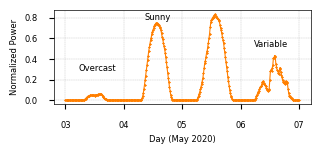

In [405]:
fig, ax = plt.subplots(figsize=bs.get_fig_size(1, 0.6))

ax.plot(solar_filtered['DateTime'], solar_filtered['Normalized Power'])
ax.grid()
ax.set_xlabel('Day (May 2020)')
ax.set_ylabel('Normalized Power')
ax.grid(True)
fig.text(0.2, 0.4, 'Overcast', va='center')
fig.text(0.4, 0.82, 'Sunny', va='center')
fig.text(0.73, 0.6, 'Variable', va='center')

# ax.xaxis.set_major_formatter(date_format)
# ax.xaxis.set_minor_locator(mdates.HourLocator(interval=12))   # every 12 hours
# ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))  # hours and minutes
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))    # every day
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d')) 
# fig.autofmt_xdate()

plt.show()
fig.savefig('figs/solar_ts.pdf', bbox_inches='tight')

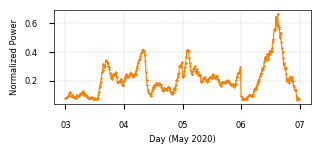

In [406]:
fig, ax = plt.subplots(figsize=bs.get_fig_size(1, 0.6))

ax.plot(wind_filtered['DateTime'], wind_filtered['Normalized Power'])
ax.grid()
ax.set_xlabel('Day (May 2020)')
ax.set_ylabel('Normalized Power')
ax.grid(True)

# ax.xaxis.set_major_formatter(date_format)
# ax.xaxis.set_minor_locator(mdates.HourLocator(interval=12))   # every 12 hours
# ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))  # hours and minutes
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))    # every day
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d')) 
# fig.autofmt_xdate()

plt.show()
fig.savefig('figs/wind_ts.pdf', bbox_inches='tight')

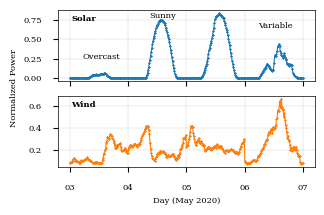

In [407]:
plt.rcParams.update({'figure.max_open_warning': 0})
# matplotlib.rcParams.update({'font.size': 16})
matplotlib.rcParams.update({'font.family': 'serif'})
matplotlib.rcParams['xtick.major.pad'] = '8'
matplotlib.rcParams['ytick.major.pad'] = '8'
matplotlib.rcParams['hatch.linewidth'] = 0.5
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(2, 1, figsize=bs.get_fig_size(1, 1), sharex=True)

axes[0].plot(solar_filtered['DateTime'], solar_filtered['Normalized Power'], color='tab:blue', marker='x')
axes[1].plot(wind_filtered['DateTime'], wind_filtered['Normalized Power'], color='tab:orange', marker='x')
axes[0].set_title('Solar', y=1.0, pad=-8, x=0.1, weight='bold')
axes[1].set_title('Wind', y=1.0, pad=-8, x=0.1, weight='bold')

axes[1].set_xlabel('Day (May 2020)')
# axes[0].set_ylabel('Normalized Power')

fig.text(0.2, 0.65, 'Overcast', va='center')
fig.text(0.4, 0.85, 'Sunny', va='center')
fig.text(0.73, 0.8, 'Variable', va='center')

for ax in axes:
    # ax.xaxis.set_major_formatter(date_format)
    # ax.xaxis.set_minor_locator(mdates.HourLocator(interval=12))   # every 12 hours
    # ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))  # hours and minutes
    ax.grid()
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))    # every day
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d')) 
    # fig.autofmt_xdate()
    
fig.text(-0.02, 0.5, 'Normalized Power', va='center', rotation='vertical')

plt.show()
fig.savefig('figs/power_ts.pdf', bbox_inches='tight')

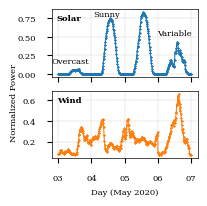

In [408]:
fig, axes = plt.subplots(2, 1, figsize=bs.get_fig_size(0.6, 1/0.6), sharex=True)

axes[0].plot(solar_filtered['DateTime'], solar_filtered['Normalized Power'], color='tab:blue', marker='x')
axes[1].plot(wind_filtered['DateTime'], wind_filtered['Normalized Power'], color='tab:orange', marker='x')
axes[0].set_title('Solar', y=1.0, pad=-8, x=0.12, weight='bold')
axes[1].set_title('Wind', y=1.0, pad=-8, x=0.12, weight='bold')

axes[1].set_xlabel('Day (May 2020)')
# axes[0].set_ylabel('Normalized Power')

fig.text(0.22, 0.7, 'Overcast', va='center')
fig.text(0.43, 0.93, 'Sunny', va='center')
fig.text(0.75, 0.84, 'Variable', va='center')

for ax in axes:
    # ax.xaxis.set_major_formatter(date_format)
    # ax.xaxis.set_minor_locator(mdates.HourLocator(interval=12))   # every 12 hours
    # ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))  # hours and minutes
    ax.grid()
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))    # every day
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d')) 
    # fig.autofmt_xdate()
    
fig.text(0.01, 0.5, 'Normalized Power', va='center', rotation='vertical')
plt.tight_layout()
plt.show()
fig.savefig('figs/power_ts_short.pdf', bbox_inches='tight')

In [409]:
st = pd.Timestamp("2020-01-01 00:00:00")
ed = st + pd.Timedelta(days=365)
print(ed)
wind_year = wind[(wind['DateTime'] >= st) & (wind['DateTime'] <= ed)]
solar_year = solar[(solar['DateTime'] >= st) & (solar['DateTime'] <= ed)]

2020-12-31 00:00:00


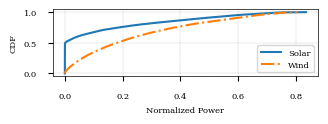

In [410]:
importlib.reload(bs)
bs.set_my_custom_size()
plt.rcParams.update({'figure.max_open_warning': 0})
# matplotlib.rcParams.update({'font.size': 16})
matplotlib.rcParams.update({'font.family': 'serif'})
matplotlib.rcParams['xtick.major.pad'] = '8'
matplotlib.rcParams['ytick.major.pad'] = '8'
matplotlib.rcParams['hatch.linewidth'] = 0.5
warnings.filterwarnings("ignore")
fig, ax = plt.subplots(1, 1, figsize=bs.get_fig_size(1, 0.6), sharex=True)

solar_ecdf = statsmodels.distributions.ECDF(solar_year['Normalized Power'])
wind_ecdf = statsmodels.distributions.ECDF(wind_year['Normalized Power'])
ax.plot(solar_ecdf.x, solar_ecdf.y, label='Solar', linewidth=1.5)
ax.plot(wind_ecdf.x, wind_ecdf.y, label='Wind', linewidth=1.5)

ax.set_xlabel('Normalized Power')
ax.set_ylabel('CDF')

ax.grid()
ax.legend()
plt.tight_layout()
plt.show()
fig.savefig('figs/power_cdf_short.pdf', bbox_inches='tight')

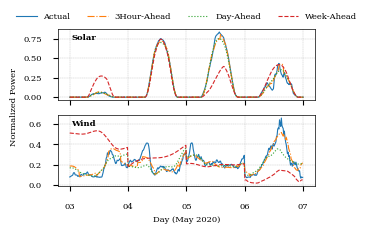

In [411]:
importlib.reload(bs)
bs.set_my_custom_size()

plt.rcParams.update({'figure.max_open_warning': 0})
# matplotlib.rcParams.update({'font.size': 16})
matplotlib.rcParams.update({'font.family': 'serif'})
matplotlib.rcParams['xtick.major.pad'] = '8'
matplotlib.rcParams['ytick.major.pad'] = '8'
matplotlib.rcParams['hatch.linewidth'] = 0.5
warnings.filterwarnings("ignore")

fig, axes = plt.subplots(2, 1, figsize=bs.get_fig_size(1, 1), sharex=True)

axes[0].plot(solar_filtered['DateTime'], solar_filtered['Normalized Power'], label='Actual')
axes[0].plot(solar_filtered['DateTime'], solar_filtered['3H'], label='3Hour-Ahead')
axes[0].plot(solar_filtered['DateTime'], solar_filtered['Day'], label='Day-Ahead')
axes[0].plot(solar_filtered['DateTime'], solar_filtered['Week'], label='Week-Ahead')

axes[1].plot(wind_filtered['DateTime'], wind_filtered['Normalized Power'], label='Actual')
axes[1].plot(wind_filtered['DateTime'], wind_filtered['3H'], label='3Hour-Ahead')
axes[1].plot(wind_filtered['DateTime'], wind_filtered['Day'], label='Day-Ahead')
axes[1].plot(wind_filtered['DateTime'], wind_filtered['Week'], label='Week-Ahead')

axes[0].legend(loc='lower center', bbox_to_anchor=(0.5, 1), ncol=4, frameon=False)

axes[0].set_title('Solar', y=1.0, pad=-8, x=0.1, weight='bold')
axes[1].set_title('Wind', y=1.0, pad=-8, x=0.1, weight='bold')

axes[1].set_xlabel('Day (May 2020)')
# axes[0].set_ylabel('Normalized Power')

for ax in axes:
    # ax.xaxis.set_major_formatter(date_format)
    # ax.xaxis.set_minor_locator(mdates.HourLocator(interval=12))   # every 12 hours
    # ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))  # hours and minutes
    ax.grid()
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))    # every day
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d')) 
    # fig.autofmt_xdate()
    
fig.text(-0.02, 0.5, 'Normalized Power', va='center', rotation='vertical')

plt.show()
fig.savefig('figs/power_prediction_ts.pdf', bbox_inches='tight')